In [114]:
#import modules
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavipanduga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# DATA PRE-PROCESSING

In [115]:
news = pd.read_csv('news 2.csv')

In [116]:
news.shape

(6335, 4)

In [117]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [118]:
news['label'] = news['label'].replace(['FAKE', 'REAL'],[1, 0])

In [119]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [120]:
news.describe()

,Unnamed: 0,label
count,6335.000000,6335.000000
mean,5280.415627,0.499448
std,3038.503953,0.500039
min,2.000000,0.000000
25%,2674.500000,0.000000
50%,5271.000000,0.000000
75%,7901.000000,1.000000
max,10557.000000,1.000000


In [121]:
#counting the number of missing values in the datatset
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# DATA PROCESSING

In [122]:
# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [123]:
stem = PorterStemmer()

In [124]:
#reduce words to their root or base form - standardize and normalize text data by removing variations
def stemming (content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem.stem(word) for word in stemmed_content if not word in stopwords.words ('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
news['title'] = news['title'].apply(stemming)

In [125]:
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

# Tokenize the text :Convert the normal text strings in to a list of tokens (words that we actually want)

news['Clean Text'] = news['text'].apply(process_text)

In [126]:
#converting words into lowercase
news = news.apply(lambda x: x.astype(str).str.lower())

In [127]:
#removing unnecessary punctuations
news['text'] = news['text'].str.replace('[^\w\s,]', '')
news['text'] = news['text'].str.replace('http\S+|www.\S+', '', case=False)
news['text'] = news['text'].str.replace(' ,', ',')
news['text'] = news['text'].str.replace(', ', ',')

/var/folders/gg/rb93zdc963qdht_9s178ppm80000gn/T/ipykernel_35736/3065326883.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news['text'] = news['text'].str.replace('[^\w\s,]', '')
/var/folders/gg/rb93zdc963qdht_9s178ppm80000gn/T/ipykernel_35736/3065326883.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news['text'] = news['text'].str.replace('http\S+|www.\S+', '', case=False)


In [128]:
#each row in the 'text' column, the code splits the text into individual words and returns a list of these words
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
news['text'] = news['text'].apply(lambda x: tokenizer.tokenize(x))

In [129]:
news['text'] = news['text'].apply(lambda x: ' '.join(x))

In [130]:
print(news.head())

  Unnamed: 0                                              title  \
0       8476                                 smell hillari fear   
1      10294  watch exact moment paul ryan commit polit suic...   
2       3608                      kerri go pari gestur sympathi   
3      10142     berni support twitter erupt anger dnc tri warn   
4        875                      battl new york primari matter   

                                                text label  \
0  daniel greenfield a shillman journalism fellow...     1   
1  google pinterest digg linkedin reddit stumbleu...     1   
2  us secretary of state john f kerry said monday...     0   
3  kaydee king kaydeeking november 9 2016 the les...     1   
4  its primary day in new york and frontrunners h...     0   

                                          Clean Text  
0  ['daniel', 'greenfield', 'shillman', 'journali...  
1  ['google', 'pinterest', 'digg', 'linkedin', 'r...  
2  ['us', 'secretary', 'state', 'john', 'f', 'ker...  
3  [

In [131]:
#vectorization with TFIDF and BOW
# Create a TfidfVectorizer object with desired configuration
vectorizer1 = TfidfVectorizer(max_features=2000)

# Fit the vectorizer to the text data
vectorizer1.fit(news['text'])

# Transform the text data into numerical vectors using TF-IDF
vectorizedtfidf = vectorizer1.transform(news['text'])

In [132]:
vectorizer2 = CountVectorizer(max_features=2000)

vectorizer2.fit(news['text'])

# Transform the text data into numerical vectors using TF-IDF
vectorizedbow = vectorizer2.transform(news['text'])

In [133]:
print("Shape of the TF-IDF vector: ", vectorizedtfidf.shape)
print("Shape of the BOW vector: ", vectorizedbow.shape)

Shape of the TF-IDF vector:  (6335, 2000)
Shape of the BOW vector:  (6335, 2000)


These are two functions that transform text data into numerical vectors that can be used in machine learning models. The two vectorization methods used here are Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF).

The first function, to_vector_Tfidf(), takes a dataframe and a column of text data as input. It uses the TfidfVectorizer class from the sklearn.feature_extraction.text module to convert the text data into numerical vectors using the TF-IDF method.

TF-IDF is a way of weighting the importance of each word in the text data by considering how frequently it appears in a document and how commonly it appears across all documents. The resulting vectors represent each document as a set of weighted words. This function sets a maximum number of 2000 features for each vectorizer to limit the dimensionality of the data.

The second function, to_vector_bow(), performs a similar transformation using the Bag of Words method. It takes the same input arguments and uses the CountVectorizer class from the same module. This method counts the number of times each word appears in each document and represents each document as a vector of word frequencies. This function also limits the number of features to 2000.

Both functions fit the vectorizer on the input text data and then transform the data into numerical vectors. They return the transformed data as output.

Overall, these functions are useful for transforming text data into numerical data that can be used in machine learning models. The choice between Bag of Words and TF-IDF depends on the specific task and the characteristics of the text data.

In [134]:
label = news['label'].values
label = label.reshape(-1, 1)

In [135]:
news.sample(5)

,Unnamed: 0,title,text,label,Clean Text
3401,1213,rubio goe robot termin donald trump,marco rubio was on a mission on thursday night...,0,"['marco', 'rubio', 'mission', 'thursday', 'nig..."
3541,4912,seven thing learn cover third parti candid,st paul minn with just 66 days to go before th...,0,"['st', 'paul', 'minn', '66', 'days', 'go', 'po..."
1159,2946,jordanian fighter jet strike hard isi pay trib...,jordanian fighter pilots carried out devastati...,0,"['jordanian', 'fighter', 'pilots', 'carried', ..."
4061,9042,set gold silver carnag bond market pre cursor ...,october 28 2016 at 1128 am reflecting on the w...,1,"['october', '28', '2016', '1128', 'reflecting'..."
3523,683,clinton say elect trump would histor mistak,the former secretary of state warned that a tr...,0,"['former', 'secretary', 'state', 'warned', 'tr..."


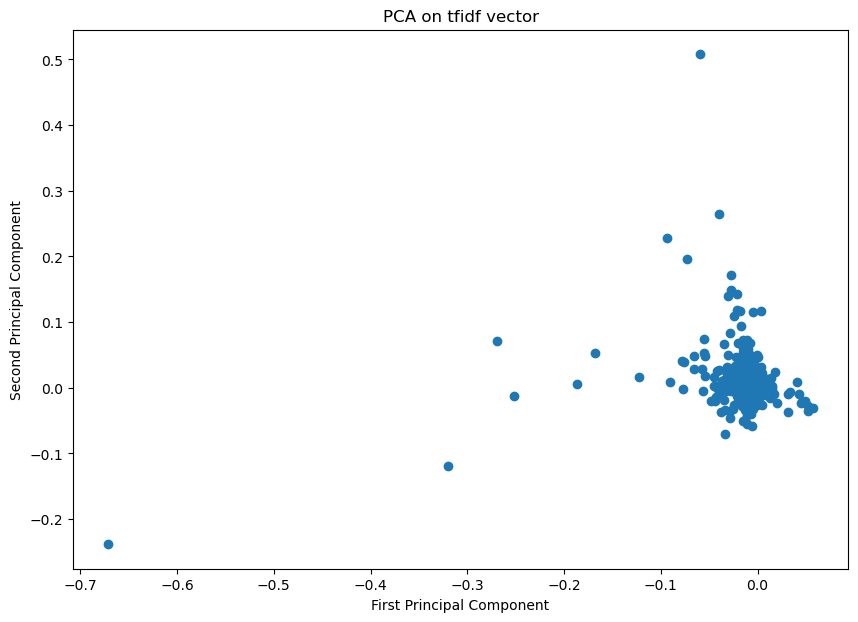

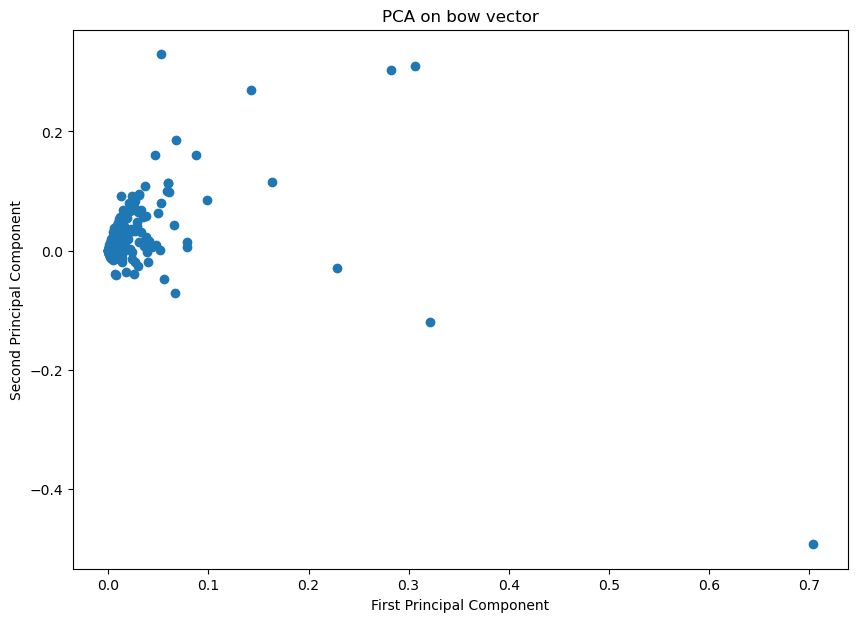

In [136]:
vectorizedtfidf_copy= vectorizedtfidf.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(vectorizedtfidf_copy.toarray())
plt.figure(figsize=(10, 7))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on tfidf vector')
plt.show()

vectorizedbow_copy= vectorizedbow.copy()
pca = PCA(n_components=2)
pca.fit_transform(vectorizedbow_copy.toarray())
plt.figure(figsize=(10, 7))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on bow vector')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6335 samples in 0.009s...
[t-SNE] Computed neighbors for 6335 samples in 5.396s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6335
[t-SNE] Computed conditional probabilities for sample 2000 / 6335
[t-SNE] Computed conditional probabilities for sample 3000 / 6335
[t-SNE] Computed conditional probabilities for sample 4000 / 6335
[t-SNE] Computed conditional probabilities for sample 5000 / 6335
[t-SNE] Computed conditional probabilities for sample 6000 / 6335
[t-SNE] Computed conditional probabilities for sample 6335 / 6335
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.086815
[t-SNE] KL divergence after 300 iterations: 3.118290


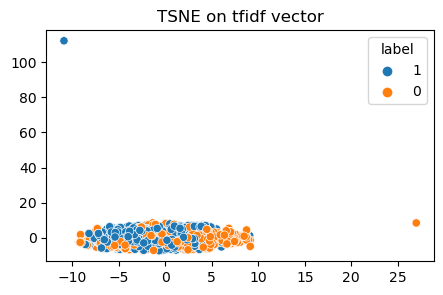

In [137]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
vectorizedtfidf_tsne_copy= vectorizedtfidf.copy()
vectorizedtfidf_tsne_copy = tsne.fit_transform(vectorizedtfidf_tsne_copy.toarray())
plt.figure(figsize=(5, 3))
import seaborn as sns
sns.scatterplot(x=vectorizedtfidf_tsne_copy[:,0], y=vectorizedtfidf_tsne_copy[:,1], hue=news['label'])
plt.title('TSNE on tfidf vector')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6335 samples in 0.005s...
[t-SNE] Computed neighbors for 6335 samples in 8.580s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6335
[t-SNE] Computed conditional probabilities for sample 2000 / 6335
[t-SNE] Computed conditional probabilities for sample 3000 / 6335
[t-SNE] Computed conditional probabilities for sample 4000 / 6335
[t-SNE] Computed conditional probabilities for sample 5000 / 6335
[t-SNE] Computed conditional probabilities for sample 6000 / 6335
[t-SNE] Computed conditional probabilities for sample 6335 / 6335
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.146904
[t-SNE] KL divergence after 300 iterations: 2.766623


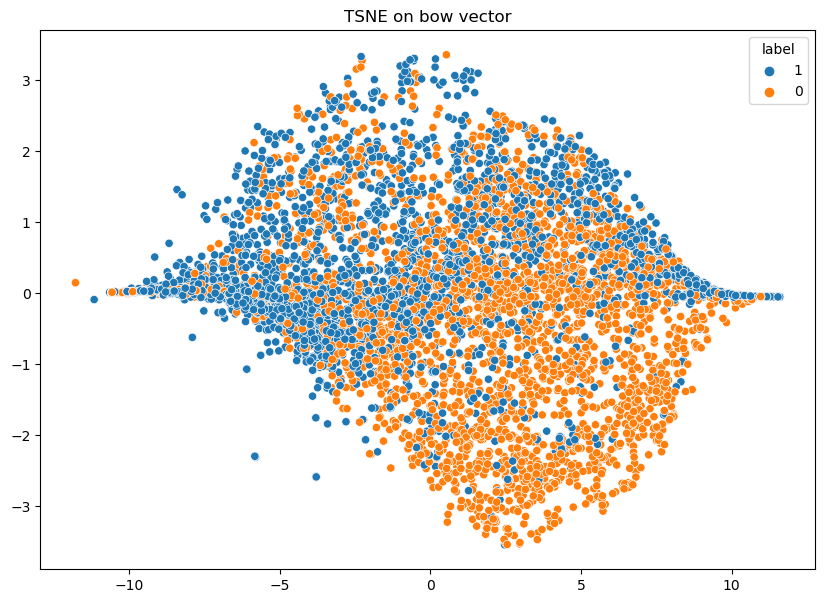

In [138]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
vectorizedbow_tsne_copy= vectorizedbow.copy()
vectorizedbow_tsne_copy = tsne.fit_transform(vectorizedbow_tsne_copy.toarray())
plt.figure(figsize=(10, 7))
import seaborn as sns
sns.scatterplot(x=vectorizedbow_tsne_copy[:,0], y=vectorizedbow_tsne_copy[:,1], hue=news['label'])
plt.title('TSNE on bow vector')
plt.show()

# TRAINING DATA

In [139]:
vectorizedtfidf = vectorizedtfidf.toarray()
vectorizedbow = vectorizedbow.toarray()

In [140]:
label = news['label'].values
print(label)
print(vectorizedbow)

['1' '1' '0' ... '1' '0' '0']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [141]:
import pandas as pd

label_reshaped = label.reshape(-1, 1)
news1 = np.concatenate((vectorizedtfidf, label_reshaped), axis=1)
news2 = np.concatenate((vectorizedbow, label_reshaped), axis=1)

# convert to DataFrame
news1_df = pd.DataFrame(news1, columns=[f"feature_{i}" for i in range(news1.shape[1]-1)]+["label"])
news2_df = pd.DataFrame(news2, columns=[f"feature_{i}" for i in range(news2.shape[1]-1)]+["label"])

# display first few rows
print(news1_df.head())


  feature_0 feature_1 feature_2 feature_3 feature_4 feature_5 feature_6  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3  0.040459       0.0       0.0  0.049305       0.0       0.0       0.0   
4       0.0  0.043736       0.0       0.0       0.0       0.0       0.0   

  feature_7 feature_8 feature_9  ... feature_1991 feature_1992 feature_1993  \
0       0.0       0.0       0.0  ...     0.026445      0.04139          0.0   
1       0.0       0.0       0.0  ...          0.0          0.0          0.0   
2       0.0       0.0       0.0  ...          0.0          0.0          0.0   
3  0.048905       0.0       0.0  ...     0.040959          0.0          0.0   
4       0.0       0.0       0.0  ...     0.209922     0.026284     0.050749   

  feature_1994 feature_1995 feature_1996 feature_1997 feature_1998  \
0   

In [146]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(news1[:, :-1], news1[:, -1], test_size=0.2, random_state=0)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(news2[:, :-1], news2[:, -1], test_size=0.2, random_state=0)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=0)

# MODELS: logistic regression, naive bayes, decision tree classifier

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

LOGISTIC REGRESSION

In [167]:
x_new = x_test[0]

prediction = model.predict(x_new)
print(prediction)

if (prediction[0] == 0):
    print('the news is real')
else:
    print('the news is fake')
    
print(x_test[0])
x_new = x_test[1]

prediction = model.predict(x_new)
print(prediction)

if (prediction[0] == 0):
    print('the news is real')
else:
    print('the news is fake')
    
print(y_test[3])
plt.scatter(news.title,news.label, marker = '+', color = 'red')

NameError: name 'x_test' is not defined

tf-idf

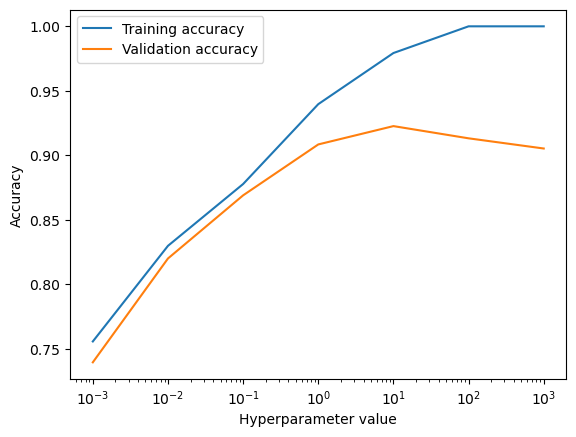

Test accuracy: 0.923


In [166]:
# Define a range of hyperparameter values to try
hyperparams = np.logspace(-3, 3, 7)

# Train a logistic regression model for each hyperparameter value and compute accuracy on training and validation sets
train_accs = []
val_accs = []
for hyperparam in hyperparams:
    model = LogisticRegression(C=hyperparam, solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train1, y_train1)
    train_acc = model.score(X_train1, y_train1)
    val_acc = model.score(X_val1, y_val1)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the accuracy curve
plt.plot(hyperparams, train_accs, label='Training accuracy')
plt.plot(hyperparams, val_accs, label='Validation accuracy')
plt.xscale('log')
plt.xlabel('Hyperparameter value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Select the best hyperparameter value based on validation accuracy
best_hyperparam = hyperparams[np.argmax(val_accs)]

# Train a final model with the selected hyperparameter and evaluate on the test set
final_model = LogisticRegression(C=best_hyperparam, solver='lbfgs', max_iter=1000, random_state=42)
final_model.fit(X_train1, y_train1)
test_acc = final_model.score(X_test1, y_test1)
print(f'Test accuracy: {test_acc:.3f}')

bow

/Users/pranavipanduga/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranavipanduga/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

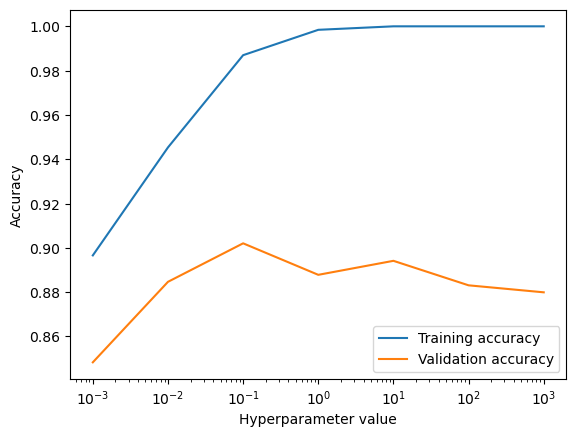

Test accuracy: 0.896


In [153]:
# Define a range of hyperparameter values to try
hyperparams = np.logspace(-3, 3, 7)

# Train a logistic regression model for each hyperparameter value and compute accuracy on training and validation sets
train_accs = []
val_accs = []
for hyperparam in hyperparams:
    model = LogisticRegression(C=hyperparam, solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train2, y_train2)
    train_acc = model.score(X_train2, y_train2)
    val_acc = model.score(X_val2, y_val2)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the accuracy curve
plt.plot(hyperparams, train_accs, label='Training accuracy')
plt.plot(hyperparams, val_accs, label='Validation accuracy')
plt.xscale('log')
plt.xlabel('Hyperparameter value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Select the best hyperparameter value based on validation accuracy
best_hyperparam = hyperparams[np.argmax(val_accs)]

# Train a final model with the selected hyperparameter and evaluate on the test set
final_model = LogisticRegression(C=best_hyperparam, solver='lbfgs', max_iter=1000, random_state=42)
final_model.fit(X_train2, y_train2)
test_acc = final_model.score(X_test2, y_test2)
print(f'Test accuracy: {test_acc:.3f}')

NAIVE BAYES: GAUSSIAN

In [154]:
def gauss_grid_learn(X_train,y_train,X_val,y_val):
    gnb=GaussianNB()
    param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}
    grid_search = GridSearchCV(gnb, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Gaussian Naive Bayes")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

tf-idf

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 0.001}
0.8494469960517234
Accuracy:  0.8388625592417062
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       334
           1       0.83      0.83      0.83       299

    accuracy                           0.84       633
   macro avg       0.84      0.84      0.84       633
weighted avg       0.84      0.84      0.84       633

[learning_curve] Training set sizes: [ 337 1097 1857 2617 3378]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   41.6s finished


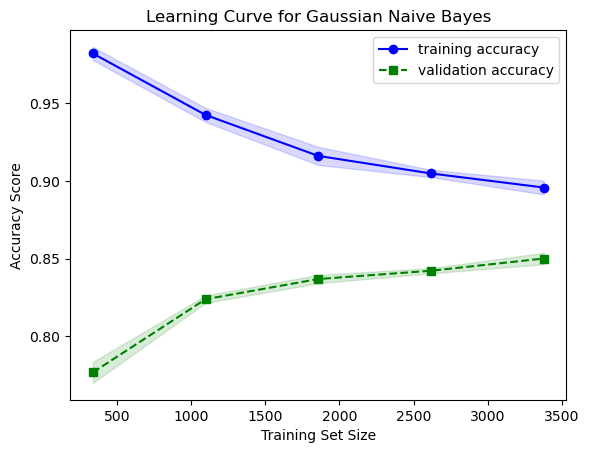

In [156]:
gauss_grid_learn(X_train1,y_train1,X_val1,y_val1)

bow

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1e-06}
0.8172844826076142
Accuracy:  0.7914691943127962
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       334
           1       0.73      0.88      0.80       299

    accuracy                           0.79       633
   macro avg       0.80      0.80      0.79       633
weighted avg       0.81      0.79      0.79       633

[learning_curve] Training set sizes: [ 337 1097 1857 2617 3378]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.6s finished


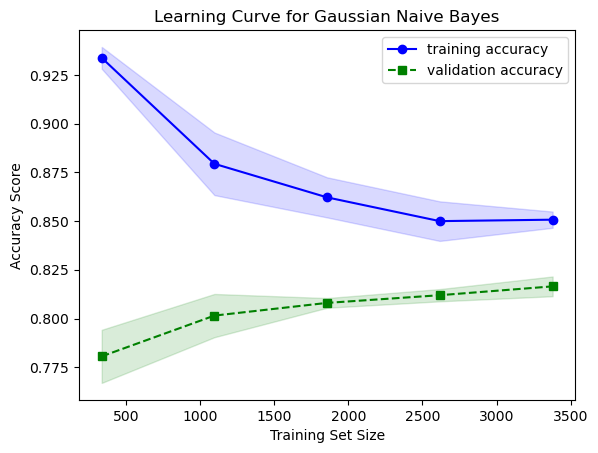

In [158]:
gauss_grid_learn(X_train2,y_train2,X_val2,y_val2)

DECISION TREE CLASSIFIER

In [163]:
def decision_grid_learn(X_train,y_train,X_val,y_val):
    dtree=DecisionTreeClassifier(random_state=0)
    param_grid = {'criterion':["gini","entropy"],'max_depth': [10, 50, 100, None]}
    grid_search = GridSearchCV(dtree, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Decision Tree")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 50}
0.7979464524484335
Accuracy:  0.7946287519747235
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       334
           1       0.78      0.79      0.78       299

    accuracy                           0.79       633
   macro avg       0.79      0.79      0.79       633
weighted avg       0.79      0.79      0.79       633

[learning_curve] Training set sizes: [ 337 1097 1857 2617 3378]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   31.1s finished


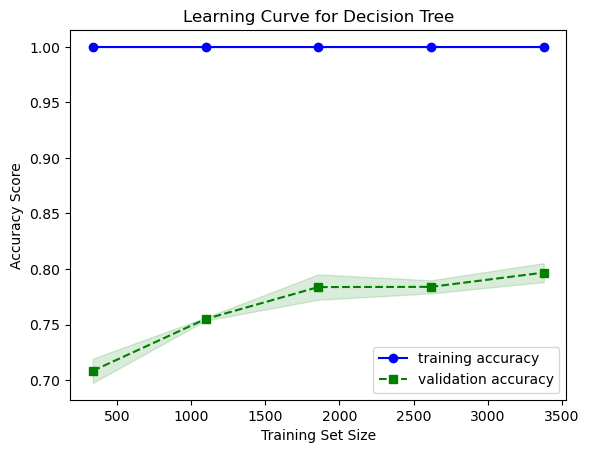

In [164]:
decision_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 10}
0.7953807149872185
Accuracy:  0.8120063191153238
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       334
           1       0.79      0.82      0.81       299

    accuracy                           0.81       633
   macro avg       0.81      0.81      0.81       633
weighted avg       0.81      0.81      0.81       633

[learning_curve] Training set sizes: [ 337 1097 1857 2617 3378]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.2s finished


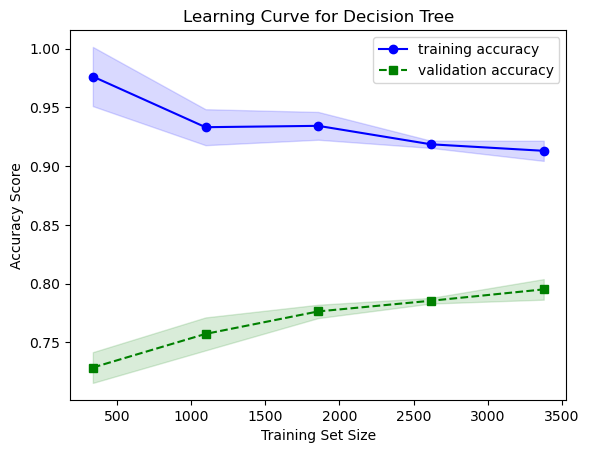

In [165]:
decision_grid_learn(X_train2,y_train2,X_val2,y_val2)